In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix
)

from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier

In [ ]:
food_data_df = pd.read_csv('/content/synthetic_food_dataset_imbalanced.csv')
food_data_df.head()

,Calories,Protein,Fat,Carbs,Sugar,Fiber,Sodium,Cholesterol,Glycemic_Index,Water_Content,Serving_Size,Meal_Type,Preparation_Method,Is_Vegan,Is_Gluten_Free,Food_Name
0,290.463673,14.340084,14.152608,35.266644,4.828030,1.291432,647.553389,24.990309,81.575896,45.669118,197.570043,dinner,fried,False,False,Pizza
1,212.626748,4.080908,11.621584,23.218957,16.347814,0.130303,68.572414,34.301652,69.522492,49.854415,103.833510,snack,raw,False,True,Ice Cream
2,330.695408,14.326708,19.747680,29.479164,6.251137,0.794477,663.171859,34.816834,62.552384,40.132866,198.989367,snack,raw,False,False,Burger
3,198.070798,9.452445,5.475896,32.097878,2.984621,1.710468,300.749543,28.510998,68.688853,57.423461,135.714202,lunch,fried,False,True,Sushi
4,274.496228,6.099547,16.256002,29.756638,17.352958,1.465676,296.314958,15.403173,70.385059,33.170460,73.019474,snack,baked,False,False,Donut


In [ ]:
food_data_df.shape

(31700, 16)

In [ ]:
food_data_df.size

507200

In [ ]:
food_data_df.describe()

,Calories,Protein,Fat,Carbs,Sugar,Fiber,Sodium,Cholesterol,Glycemic_Index,Water_Content,Serving_Size
count,31325.000000,31325.000000,31325.000000,31325.000000,31325.000000,31325.000000,31325.000000,31325.000000,31325.000000,31325.000000,31325.000000
mean,273.378441,9.523802,12.476848,28.943200,8.543813,1.904044,335.387611,26.865167,64.213509,48.976592,150.731940
std,111.457160,8.024212,8.425834,12.668795,7.989075,1.779542,319.066106,24.965067,25.390239,20.738749,51.796599
min,60.786204,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.465039,58.575705
25%,210.301731,3.858307,8.245636,25.098800,3.739656,0.741204,63.000654,12.701920,59.984731,38.994221,109.511113
50%,281.774249,9.091637,11.574161,29.681430,5.500479,1.646608,292.525242,23.285882,68.436204,45.613748,151.706514
75%,329.821946,12.683957,15.818611,34.635789,14.426303,2.668750,631.367901,35.132214,75.464697,52.399496,189.083806
max,1289.956763,81.761772,88.619611,140.585537,78.548162,18.891993,2724.236846,260.149443,286.126400,251.837472,554.719629


In [ ]:
food_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31700 entries, 0 to 31699
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Calories            31325 non-null  float64
 1   Protein             31325 non-null  float64
 2   Fat                 31325 non-null  float64
 3   Carbs               31325 non-null  float64
 4   Sugar               31325 non-null  float64
 5   Fiber               31325 non-null  float64
 6   Sodium              31325 non-null  float64
 7   Cholesterol         31325 non-null  float64
 8   Glycemic_Index      31325 non-null  float64
 9   Water_Content       31325 non-null  float64
 10  Serving_Size        31325 non-null  float64
 11  Meal_Type           31700 non-null  object 
 12  Preparation_Method  31700 non-null  object 
 13  Is_Vegan            31700 non-null  bool   
 14  Is_Gluten_Free      31700 non-null  bool   
 15  Food_Name           31700 non-null  object 
dtypes: b

In [ ]:
## Feature wise Null value counts ##

food_data_df.isnull().sum()

,0
Calories,375
Protein,375
Fat,375
Carbs,375
Sugar,375
Fiber,375
Sodium,375
Cholesterol,375
Glycemic_Index,375
Water_Content,375


In [ ]:
## Total Duplicate values ##
food_data_df.duplicated().sum()

np.int64(313)

In [ ]:
## Total Null values ##
food_data_df.isnull().sum().sum()

np.int64(4125)

In [ ]:
### To impute null values ###

nutrition_cols = [
    "Calories", "Protein", "Fat", "Carbs", "Sugar", "Fiber",
    "Sodium", "Cholesterol", "Glycemic_Index",
    "Water_Content", "Serving_Size"
]

food_data_df[nutrition_cols] = food_data_df[nutrition_cols].fillna(
    food_data_df[nutrition_cols].median()
)

cat_cols = ["Preparation_Method", "Food_Name", "Meal_Type"]
food_data_df[cat_cols] = food_data_df[cat_cols].fillna("Unknown")

bool_cols = ["Is_Vegan", "Is_Gluten_Free"]
for col in bool_cols:
    food_data_df[col].fillna(food_data_df[col].mode()[0])

processed_food_df = food_data_df.copy()

In [ ]:
processed_food_df.drop_duplicates(inplace=True)

In [ ]:
processed_food_df.duplicated().sum()

np.int64(0)

In [ ]:
processed_food_df.isnull().sum().sum()

np.int64(0)

In [ ]:
class_distribution = processed_food_df['Food_Name'].value_counts()
print("\nClass Distribution:")
print(class_distribution)


Class Distribution:
Food_Name
Pizza        5916
Burger       4938
Donut        4466
Pasta        3975
Sushi        3462
Ice Cream    2968
Steak        1992
Apple        1484
Banana       1193
Salad         993
Name: count, dtype: int64


In [ ]:
stats_per_class = processed_food_df.groupby('Food_Name')[nutrition_cols].mean()
print("\nMean feature values per class:")
print(stats_per_class)


Mean feature values per class:
             Calories    Protein  ...  Water_Content  Serving_Size
Food_Name                         ...                             
Apple      102.753024   1.013688  ...      85.725517    151.937227
Banana     111.165110   1.697920  ...      74.658174    122.321510
Burger     352.403157  14.128392  ...      45.546704    180.760104
Donut      261.874181   4.200055  ...      30.663107     81.220017
Ice Cream  214.293294   3.367546  ...      50.832679    102.199219
Pasta      321.480453   8.140768  ...      45.523757    150.572564
Pizza      301.587379  12.140068  ...      40.448221    200.513825
Salad      123.346861   3.211576  ...      89.670843    101.643297
Steak      400.959249  25.080734  ...      55.596912    200.661641
Sushi      202.606292  10.050509  ...      50.424070    141.368796

[10 rows x 11 columns]


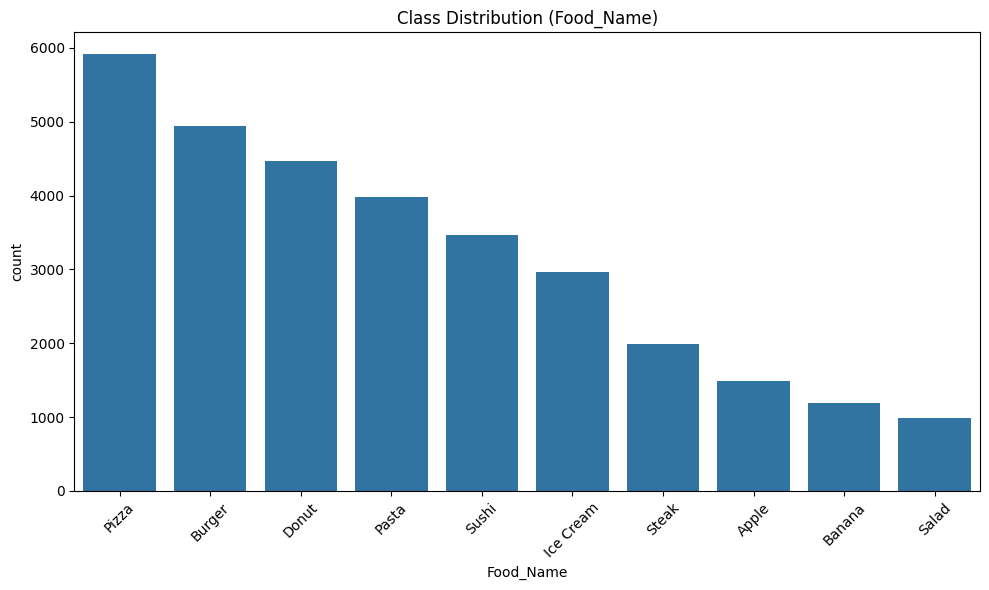

In [ ]:
### Class Distribution ###

plt.figure(figsize=(10, 6))
order = processed_food_df['Food_Name'].value_counts().index
sns.countplot(data=processed_food_df, x='Food_Name', order=order)
plt.title('Class Distribution (Food_Name)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('class_distribution.png')

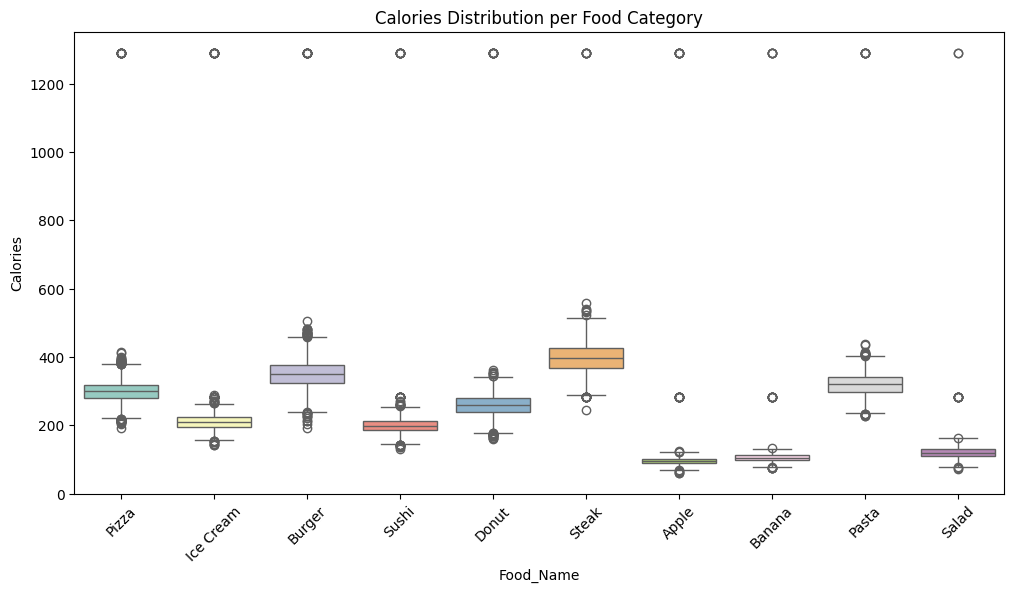

In [ ]:
### Calories Distribution ###

plt.figure(figsize=(12, 6))
sns.boxplot(data=processed_food_df, x='Food_Name', y='Calories', hue='Food_Name', palette='Set3', legend=False)
plt.title('Calories Distribution per Food Category')
plt.xticks(rotation=45)
plt.savefig('calories_boxplot.png')

In [ ]:
# 3. Detect and cap outliers using IQR method
def cap_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return series.clip(lower=lower_bound, upper=upper_bound)

df_capped = processed_food_df.copy()
for col in nutrition_cols:
    df_capped[col] = cap_outliers(processed_food_df[col])

In [ ]:
# 4. Normalize or standardize numerical features
scaler = StandardScaler()
df_pre_processed = df_capped.copy()
df_pre_processed[nutrition_cols] = scaler.fit_transform(df_capped[nutrition_cols])

# Save the preprocessed dataset
output_file = 'preprocessed_food_data.csv'
df_pre_processed.to_csv(output_file, index=False)

**Preprocessed Dataset:**

1. Duplicate Removal

    A total of 313 duplicate rows were identified and removed to ensure data integrity.

2. Handling Missing Values

    Missing numerical values (which affected approximately $1.18\%$ of the dataset) were handled using class-specific median imputation. Instead of a global average, the median value for each specific Food_Name was used to fill NaNs, preserving the nutritional characteristics of each category.

3. Outlier Management

    Outliers in numerical features were addressed using the Interquartile Range (IQR) method. Values falling outside the boundaries of $[Q1 - 1.5 \times IQR, Q3 + 1.5 \times IQR]$ were capped (clipped) to these bounds. This reduces the impact of extreme values on model training while retaining the information from those observations.

4. Feature Standardization
  
    All numerical features were standardized using Z-score normalization (StandardScaler). This scales the features such that they have a mean of $0$ and a standard deviation of $1$, which is essential for many machine learning algorithms (e.g., SVMs, Neural Networks).
  
5. Final Dataset Structure

    The cleaned and transformed dataset contains 31,387 entries.

In [ ]:
## Identify Features & Target

X = df_pre_processed.drop("Food_Name", axis=1)
y = df_pre_processed["Food_Name"]

In [ ]:
## Separate Numerical & Categorical Columns

num_cols = X.select_dtypes(include=["int64", "float64"]).columns
cat_cols = X.select_dtypes(include=["object", "bool"]).columns

In [ ]:
## Preprocessing Pipeline

numeric_pipeline = Pipeline([
    ("scaler", StandardScaler())
])
numeric_pipeline

categorical_pipeline = Pipeline([
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])
categorical_pipeline

Pipeline(steps=[('encoder', OneHotEncoder(handle_unknown='ignore'))])

In [ ]:
## Combine Using ColumnTransformer ##

preprocessor = ColumnTransformer([
    ("num", numeric_pipeline, num_cols),
    ("cat", categorical_pipeline, cat_cols)
])
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 Index(['Calories', 'Protein', 'Fat', 'Carbs', 'Sugar', 'Fiber', 'Sodium',
       'Cholesterol', 'Glycemic_Index', 'Water_Content', 'Serving_Size'],
      dtype='object')),
                                ('cat',
                                 Pipeline(steps=[('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 Index(['Meal_Type', 'Preparation_Method', 'Is_Vegan', 'Is_Gluten_Free'], dtype='object'))])

In [ ]:
## Train-Test Split ##

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

In [ ]:
## Random Forest Classifier Model Used for ML ##

model = RandomForestClassifier(
    n_estimators=200,
    class_weight="balanced",
    random_state=42
)
model

RandomForestClassifier(class_weight='balanced', n_estimators=200,
                       random_state=42)

In [ ]:
## Full ML Pipeline ##

pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("model", model)
])
pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Calories', 'Protein', 'Fat', 'Carbs', 'Sugar', 'Fiber', 'Sodium',
       'Cholesterol', 'Glycemic_Index', 'Water_Content', 'Serving_Size'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Meal_Type', 'Preparation_Method', 'Is_Vegan', 'Is_Gluten_Free'], dtype='object'))])),
                ('model',
                 RandomForestClassifier(class_weight='balanced',
                                        n_estimators=200, random_state=42))])

In [ ]:
## Train Model ##

pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Calories', 'Protein', 'Fat', 'Carbs', 'Sugar', 'Fiber', 'Sodium',
       'Cholesterol', 'Glycemic_Index', 'Water_Content', 'Serving_Size'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Meal_Type', 'Preparation_Method', 'Is_Vegan', 'Is_Gluten_Free'], dtype='object'))])),
                ('model',
                 RandomForestClassifier(class_weight='balanced',
                                        n_estimators=200, random_state=42))])

In [ ]:
## Model Evaluation ##

y_pred_train=pipeline.predict(X_train)
y_pred_test=pipeline.predict(X_test)

In [ ]:
## accuracy check process ##

accuracy = accuracy_score(y_test, y_pred_test)
accuracy


0.9931506849315068

In [ ]:
# Evaluate the Model For Both Train And Test
print('Random Forest - Classification Report For Train')
print(classification_report(y_train,y_pred_train))
print('Random Forest - Classification Report For Test')
print(classification_report(y_test,y_pred_test))

Random Forest - Classification Report For Train
              precision    recall  f1-score   support

       Apple       1.00      0.99      1.00      1187
      Banana       1.00      0.99      1.00       954
      Burger       1.00      1.00      1.00      3950
       Donut       1.00      1.00      1.00      3573
   Ice Cream       1.00      0.99      1.00      2374
       Pasta       0.99      1.00      0.99      3180
       Pizza       1.00      1.00      1.00      4733
       Salad       0.99      1.00      0.99       794
       Steak       0.99      1.00      0.99      1594
       Sushi       1.00      1.00      1.00      2770

    accuracy                           1.00     25109
   macro avg       1.00      1.00      1.00     25109
weighted avg       1.00      1.00      1.00     25109

Random Forest - Classification Report For Test
              precision    recall  f1-score   support

       Apple       0.99      0.99      0.99       297
      Banana       1.00      0.98    

In [ ]:
## Confusion Matrix ##

confusion_matrix(y_test, y_pred_test)

array([[ 295,    1,    0,    0,    0,    0,    0,    1,    0,    0],
       [   3,  235,    0,    0,    0,    0,    0,    1,    0,    0],
       [   0,    0,  975,    2,    0,    2,    9,    0,    0,    0],
       [   0,    0,    1,  889,    0,    2,    1,    0,    0,    0],
       [   0,    0,    0,    0,  593,    0,    0,    0,    0,    1],
       [   0,    0,    2,    1,    0,  789,    3,    0,    0,    0],
       [   0,    0,    6,    0,    0,    3, 1174,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,  199,    0,    0],
       [   0,    0,    0,    0,    1,    0,    0,    0,  397,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    3,  689]])

In [ ]:
## Preprocessing + PCA Pipeline ##

numeric_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("pca", PCA(n_components=0.95))
])

categorical_pipeline = Pipeline([
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor_pca = ColumnTransformer([
    ("num", numeric_pipeline, num_cols),
    ("cat", categorical_pipeline, cat_cols)
])

pipeline_pca = Pipeline([
    ("preprocessor", preprocessor_pca),
    ("model", RandomForestClassifier(
        n_estimators=200,
        class_weight="balanced",
        random_state=42
    ))
])

pipeline_pca.fit(X_train, y_train)
y_pred_pca = pipeline_pca.predict(X_test)

# Evaluate the Model For Both Train And Test
print('PCA - Report For Train Test')
print(classification_report(y_test, y_pred_pca))

PCA - Report For Train Test
              precision    recall  f1-score   support

       Apple       0.98      0.97      0.97       297
      Banana       0.97      0.97      0.97       239
      Burger       0.97      0.96      0.97       988
       Donut       0.99      1.00      0.99       893
   Ice Cream       1.00      1.00      1.00       594
       Pasta       0.99      0.99      0.99       795
       Pizza       0.97      0.98      0.97      1183
       Salad       0.99      1.00      0.99       199
       Steak       0.99      1.00      0.99       398
       Sushi       1.00      1.00      1.00       692

    accuracy                           0.98      6278
   macro avg       0.99      0.99      0.99      6278
weighted avg       0.98      0.98      0.98      6278

